# **0.0 Imports**

In [124]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

# **1.0 Load Dataset**

In [83]:

##pd.set_option('display.float_format', lambda x: '%.2f' % x)
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [16, 9]
    plt.rcParams['font.size'] = 24
    
    #display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [61]:
data = pd.read_csv('../data/data.csv')

## **1.1 Data Transform**

In [62]:
data.dtypes

Data        object
inflacao    object
cambio      object
juros       object
dtype: object

In [65]:

df1 = data.copy()
cols_new = ['date', 'cpi', 'exchange_rate', 'interest_rate']
df1.columns = cols_new


df1['date'] = pd.to_datetime(df1['date'], format='%d/%m/%Y')
df1 = df1.set_index(['date'])

## **1.2 Data Visualization**

In [73]:
cols2 = ['cpi', 'exchange_rate', 'interest_rate']

for col in cols2:
    df1[col] = df1[col].apply(lambda x: x.replace(',', '.'))

df1[['cpi', 'exchange_rate', 'interest_rate']] = df1[['cpi', 'exchange_rate', 'interest_rate']].astype(float)

Text(0, 0.5, 'date')

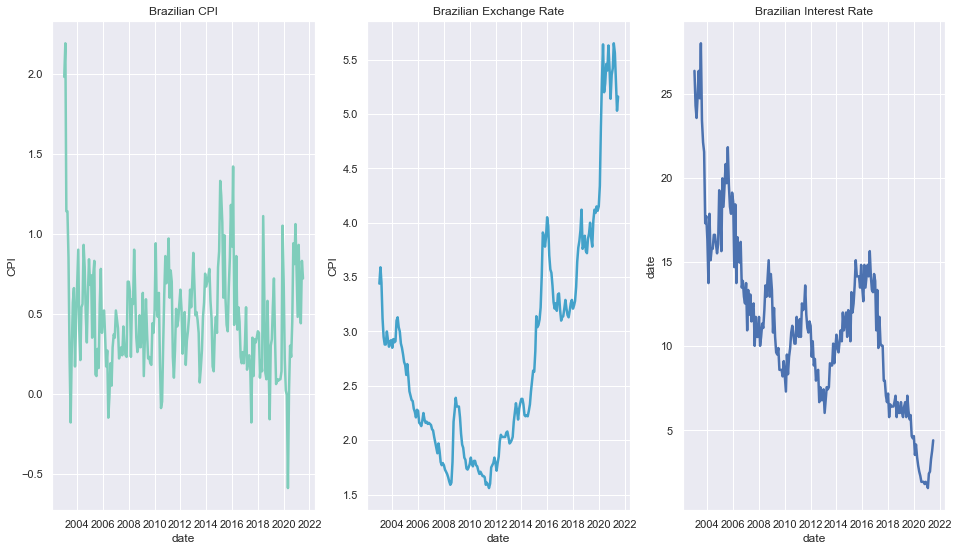

In [101]:
plt.subplot(1, 3, 1)
sns.lineplot(x = 'date', y = 'cpi', data = df1, color = '#7fcdbb', linewidth=2.5);
plt.title('Brazilian CPI')
plt.ylabel('CPI')
plt.subplot(1, 3, 2)
sns.lineplot(x = 'date', y = 'exchange_rate', data = df1, color = '#43a2ca', linewidth=2.5);
plt.title('Brazilian Exchange Rate')
plt.ylabel('CPI')
plt.subplot(1, 3, 3)
sns.lineplot(x = 'date', y = 'interest_rate', data = df1, linewidth=2.5);
plt.title('Brazilian Interest Rate')
plt.ylabel('date')


# **2.0 Model: Rolling Regression**

In [128]:
df2 = df1.copy()

In [129]:
roll_reg = RollingOLS.from_formula('cpi ~ exchange_rate + interest_rate - 1', window= 25, data= df2 )
model = roll_reg.fit()

In [130]:
model.params[20:30]

,exchange_rate,interest_rate
date,,
2004-09-01,NaN,NaN
2004-10-01,NaN,NaN
2004-11-01,NaN,NaN
2004-12-01,NaN,NaN
2005-01-01,0.221933,0.002923
2005-02-01,0.287499,-0.009635
2005-03-01,0.290346,-0.014089
2005-04-01,0.287651,-0.014397
2005-05-01,0.306200,-0.017897


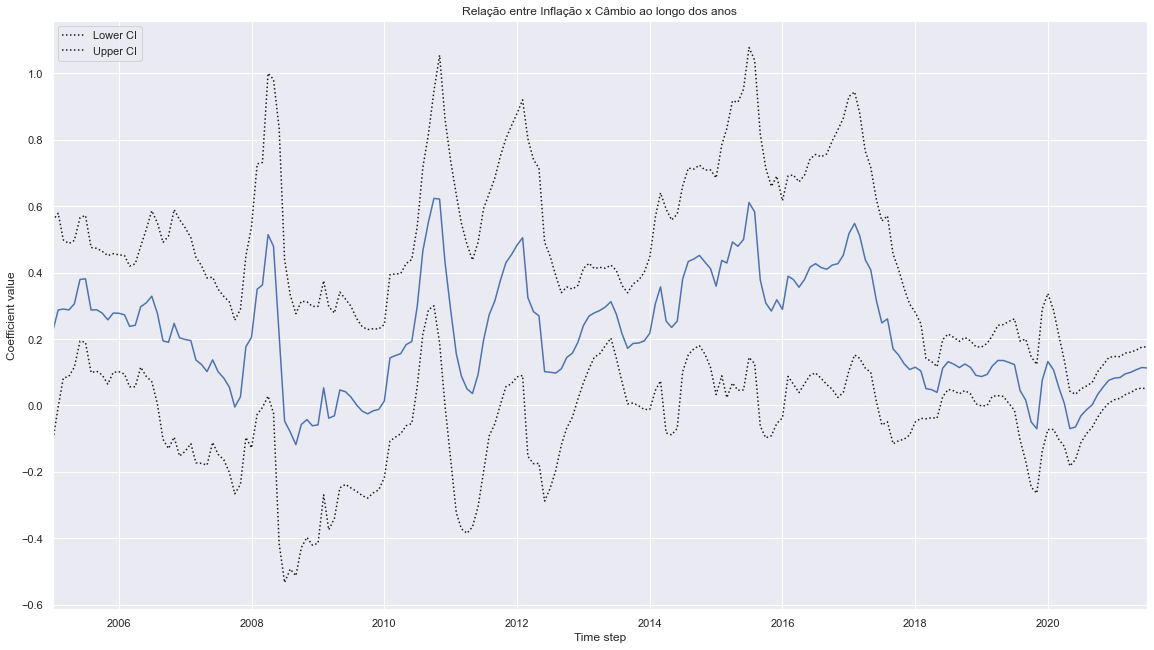

In [131]:
fig = model.plot_recursive_coefficient(variables=['exchange_rate'])
plt.title('Relação entre Inflação x Câmbio ao longo dos anos')
plt.xlabel('Time step')
plt.ylabel('Coefficient value')
plt.show()

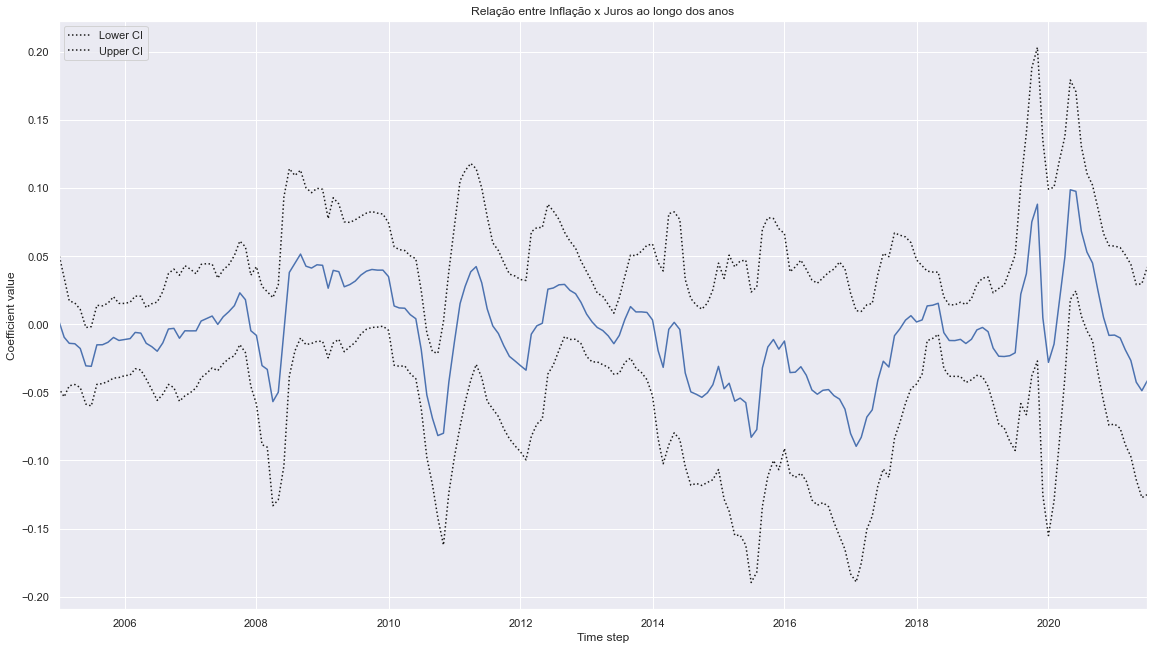

In [132]:
fig = model.plot_recursive_coefficient(variables=['interest_rate'])
plt.title('Relação entre Inflação x Juros ao longo dos anos')
plt.xlabel('Time step')
plt.ylabel('Coefficient value')
plt.show()

In [133]:
model_rls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                    cpi   No. Observations:                  223
Model:                    RecursiveLS   Log Likelihood                 -82.150
Date:                Sat, 16 Oct 2021   R-squared:                       0.673
Time:                        08:45:16   AIC                            168.301
Sample:                    01-01-2003   BIC                            175.115
                         - 07-01-2021   HQIC                           171.051
Covariance Type:            nonrobust   Scale                            0.112
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
exchange_rate     0.0785      0.013      6.231      0.000       0.054       0.103
interest_rate     0.0215      0.003      7.122      0.000       0.016       0.027
===================================================================================
Ljung-Box (L1) (Q):                  80.70   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.00   Prob(JB):                         0.53
Heteroskedasticity (H):               1.25   Skew:                            -0.09
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
"""